In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy import stats

In [6]:
df = pd.read_csv(r"Titanique.csv")

In [7]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Age_missing  418 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 36.5+ KB


In [8]:
messing = df.isna().sum()
messing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
total = df.shape[0]  
pourcentage = ( messing / total ).round(2)*100
result_table = pd.DataFrame({
    'Nombre de valeurs manquantes': messing,
    'Fréquence des valeurs manquantes (%)':pourcentage
})
result_table

,Nombre de valeurs manquantes,Fréquence des valeurs manquantes (%)
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,86,21.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,1,0.0
Cabin,327,78.0


# 🚀 Analyse de la distribution des données : La quête du naturel ! 

Pour vérifier si nos données sont bien dans le monde du **normal**, nous allons utiliser trois techniques : **test de Shapiro-Wilk**, **histogramme**, et **QQ-Plot**. Prêts pour l’aventure ?


In [16]:
stat , p_value = stats.shapiro(df['Age'])
print(f'Statistic: {stat}, P-value: {p_value}')
alpha = 0.05
if p_value > alpha:
    print("Age suit une distribution normale (ne pas rejeter H0)")
else:
    print("Age ne suit pas une distribution normale (rejeter H0)")

Statistic: nan, P-value: nan
Age ne suit pas une distribution normale (rejeter H0)


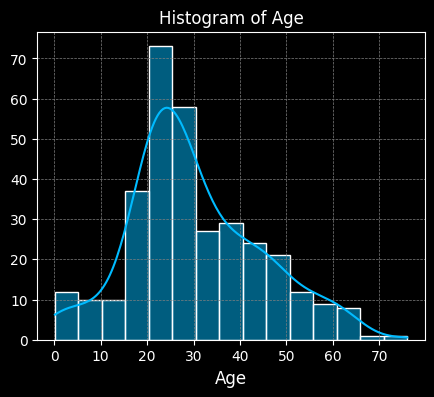

In [17]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Age', kde=True, color='#00bbff')
plt.title('Histogram of Age')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

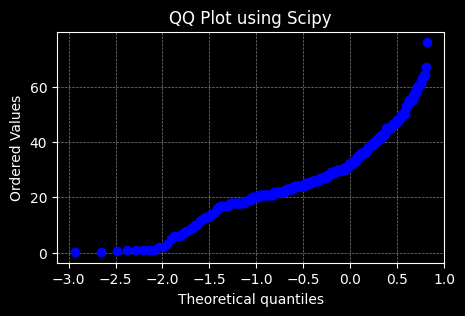

In [18]:
data = df['Age']
plt.figure(figsize = (5,3))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [38]:
df['Age'].skew()

np.float64(0.4573612871503845)

### Interprétation de la Skewness (Asymétrie)

L'asymétrie positive **légère** (0,457) indique que la distribution est légèrement **orientée vers la droite**, c'est-à-dire qu'il y a quelques grandes valeurs qui influencent la distribution, mais pas de manière excessive. 

### Conséquence sur le choix du remplacement :

Étant donné cette asymétrie positive, **la médiane** (Median) est une meilleure représentation de la tendance centrale que la moyenne (Mean), surtout pour le remplacement des valeurs manquantes.



In [23]:
df['Age_missing'] = df['Age'].isna()
missing_by_sex = df.groupby('Sex')['Age_missing'].mean()
missing_by_sex

Sex
female    0.164474
male      0.229323
Name: Age_missing, dtype: float64

In [37]:
mean_age = df.groupby('Sex')['Age'].mean().round(2)
mean_age

Sex
female    30.27
male      30.27
Name: Age, dtype: float64

In [40]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [41]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_missing      0
dtype: int64

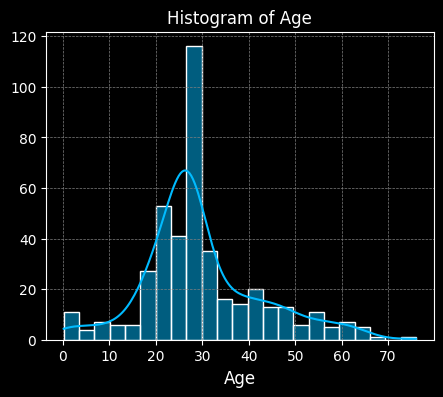

In [42]:
plt.style.use('dark_background')
plt.figure(figsize = (5,4))
sns.histplot(data=df, x='Age', kde=True, color='#00bbff')
plt.title('Histogram of Age')
plt.xlabel('Age', fontsize=12, color='white')
plt.ylabel('') 
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

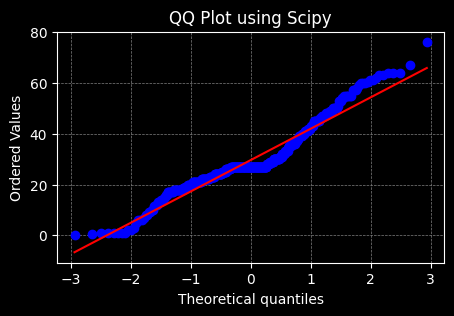

In [43]:
data = df['Age']
plt.figure(figsize = (5,3))
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot using Scipy')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [44]:
df['Age'].skew()

np.float64(0.6607470412147504)

## Rapport d'Analyse des Données du Titanic 

### Objectif :
Le but de cet exercice est de trouver **la meilleure méthode** pour remplacer les valeurs manquantes, en particulier celles de la colonne `Age`.

---

### 1️⃣ Lecture des données :
On a commencé par **lire le dataset du Titanic**.

### 2️⃣ Analyse des données manquantes :
- **Pourcentage de valeurs manquantes dans `Age`** : 21%  
  - **Interprétation** :  
    - Plus de 15%, donc c’est un **manque important**.  
    - Moins de 30%, ce qui signifie qu’on **ne peut pas utiliser une régression linéaire** pour les estimer de manière fiable. 

---

### 3️⃣ Vérification de la normalité de la distribution d'`Age` :
- **Test de Shapiro-Wilk** : ❌ Pas normal  
- **Histogramme** : ❌ Pas normal  
- **QQ-Plot** : ❌ Pas normal  
- **Skewness (Asymétrie)** : **Positif** (0.457)  
  - **Conclusion** : La distribution est légèrement **orientée vers la droite**.

À ce stade, c'est clair. Le dataset m’a presque parlé :  
*"ra wlah ma 3endy distribution normale, a sidi."* 

---

### 4️⃣ Meilleure méthode de remplacement :
Puisque la **distribution n’est pas normale** et qu'elle est **légèrement asymétrique**, le **médian** (Median) est **le meilleur choix** pour remplacer les valeurs manquantes.

---

### 5️⃣ Code de remplacement :
```python
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
